In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

data = pd.read_csv(r"C:\Users\P R O B O O K\Downloads\data_jobs.csv")
df = data.copy()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [1]:
import seaborn as sns

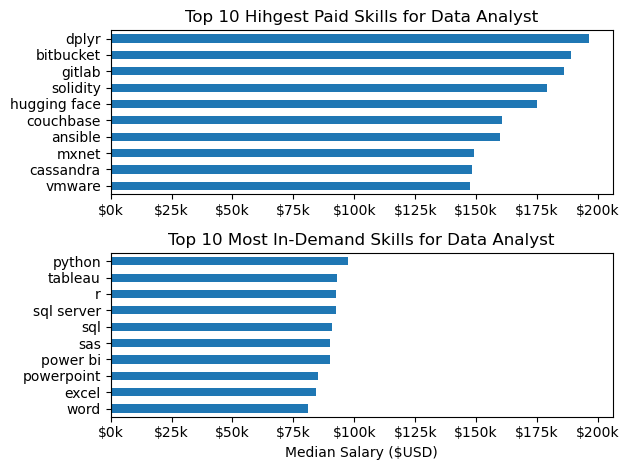

In [5]:
#Only get data analyst job from united states
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NAN vlaues from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US= df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2,1)

#Top 10 Hihgest Paid Skills for Data Analyst
df_DA_top_pay[::-1].plot(kind='barh', y= 'median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Hihgest Paid Skills for Data Analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

#Top 10 Most In-Demand Skills for Data Analyst
df_DA_skills[::-1].plot(kind='barh', y= 'median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

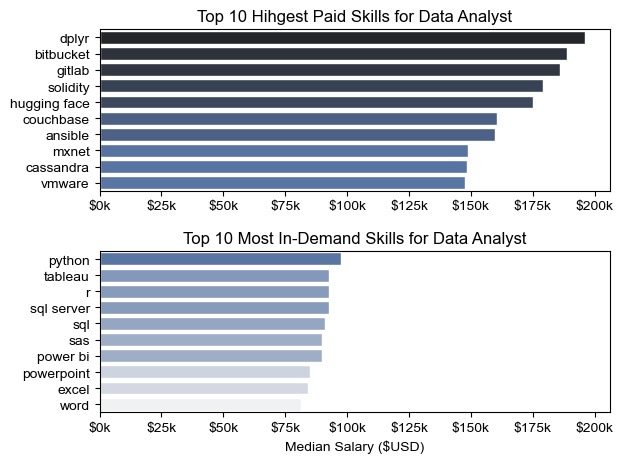

In [17]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

#Top 10 Hihgest Paid Skills for Data Analyst
#df_DA_top_pay[::-1].plot(kind='barh', y= 'median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x= 'median', y = df_DA_top_pay.index, ax= ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Hihgest Paid Skills for Data Analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

#Top 10 Most In-Demand Skills for Data Analyst
#df_DA_skills[::-1].plot(kind='barh', y= 'median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x= 'median', y = df_DA_skills.index, ax= ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()

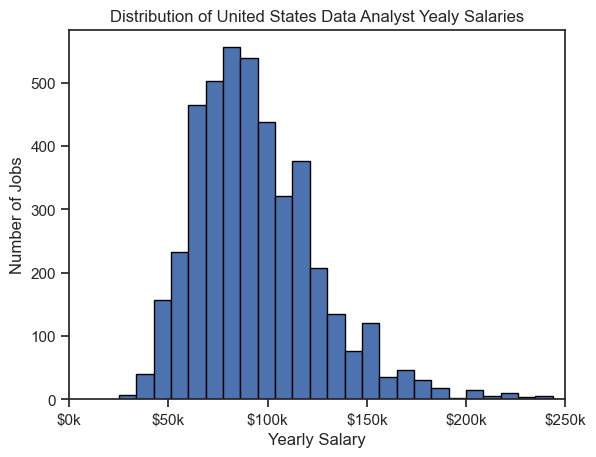

In [18]:
#Only get data analyst jobs in the US
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US['salary_year_avg'].plot(kind='hist', bins= 40, edgecolor = 'black')
plt.xlim(0, 250000)
ax= plt.gca()

#Formatting the Y axis to have $k
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.title('Distribution of United States Data Analyst Yealy Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

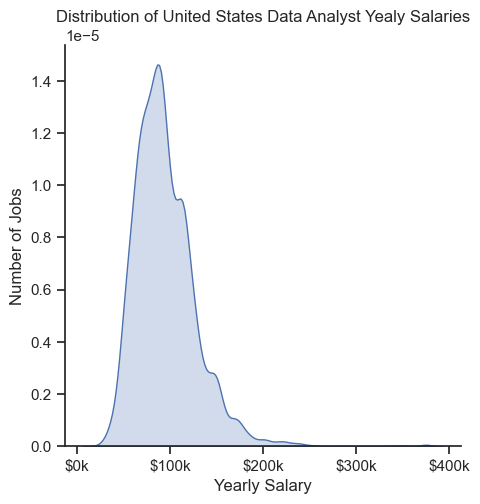

In [21]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yealy Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

C:\Users\P R O B O O K\AppData\Local\Temp\ipykernel_16804\2214630734.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert= False)


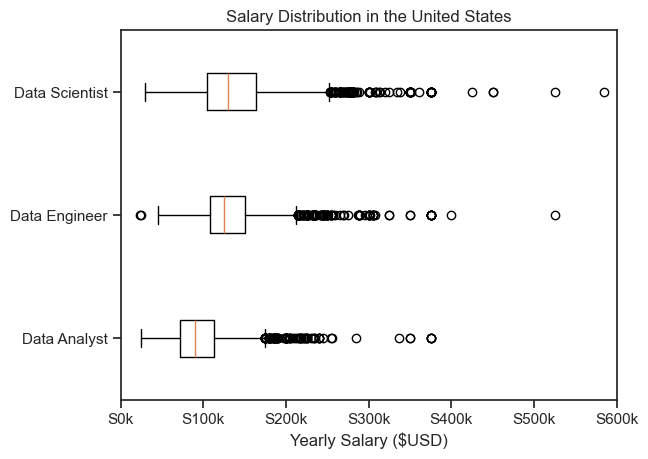

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Filter f]the data to appropiate job_title
#only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert= False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'S{int(x/1000)}k'))
plt.show()

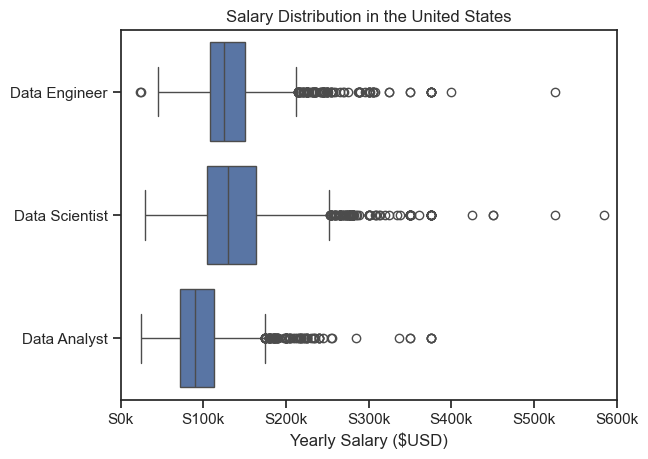

In [28]:
sns.boxplot(data=df_US, x='salary_year_avg', y ='job_title_short')
#plt.boxplot(job_list, labels=job_titles, vert= False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0,600000)
plt.ylabel('')
ticks_x=plt.FuncFormatter(lambda x, pos: f'S{int(x/1000)}k')
ax = plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()